
# **Titanic EDA And Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file1 = pd.read_csv('./Titanic.csv')

In [3]:
file1.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
file1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
file1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [6]:
# Checking for duplicate values

file1.duplicated().sum()

0

In [7]:
# There are no duplicate values in the dataset.
# So, let's check for the null values in the dataset.

file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
file1.dropna(subset=['Embarked'], inplace = True)

In [9]:
file1.shape

(889, 12)

In [10]:
file1['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [11]:
file1 ['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

In [12]:
file1['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 146, dtype: int64

In [13]:
val = '''
We can observe null vaues which is greater than the 80 % or odd.
Here the This column is bring more noise to the data set. So It's better to remove this dataset. Then to fill the values with some values. 
'''

print(val)


We can observe null vaues which is greater than the 80 % or odd.
Here the This column is bring more noise to the data set. So It's better to remove this dataset. Then to fill the values with some values. 



In [14]:
## Dropping the column Cabin.

file1.drop(['Cabin'], axis = 1, inplace = True)

In [15]:
file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
file1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

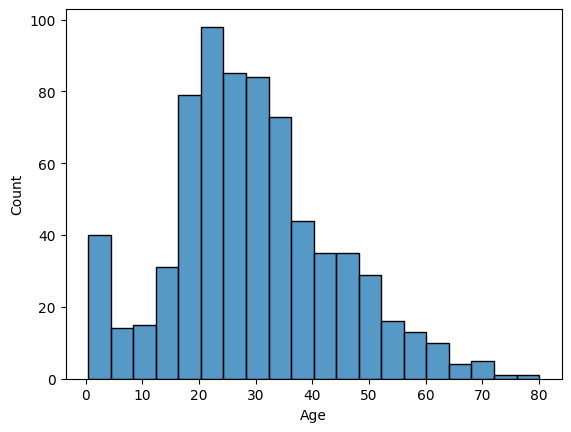

In [17]:
sns.histplot(file1['Age']) # type: ignore
plt.show()

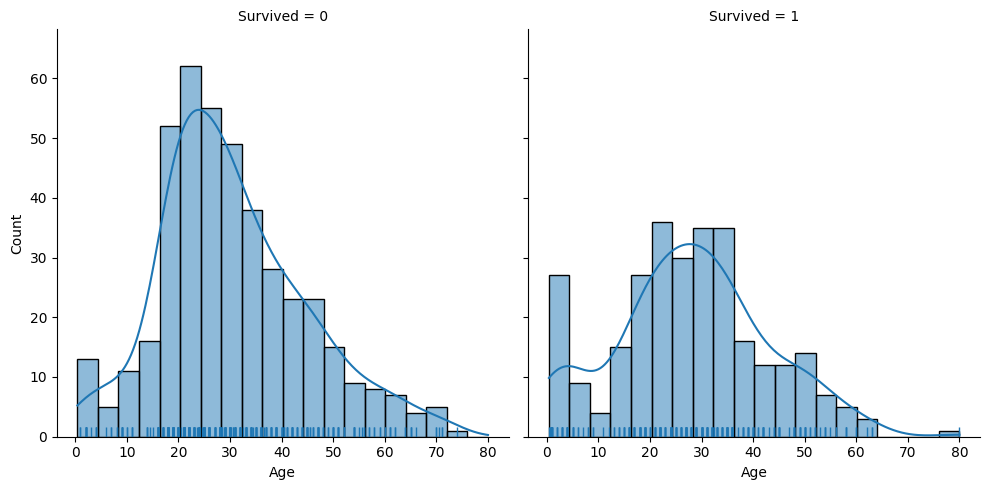

In [18]:
sns.displot(x = 'Age', data = file1, col = 'Survived', kde = True, rug = True) # type: ignore
plt.show()

In [19]:
file1['Adult'] = file1['Age'] > 18

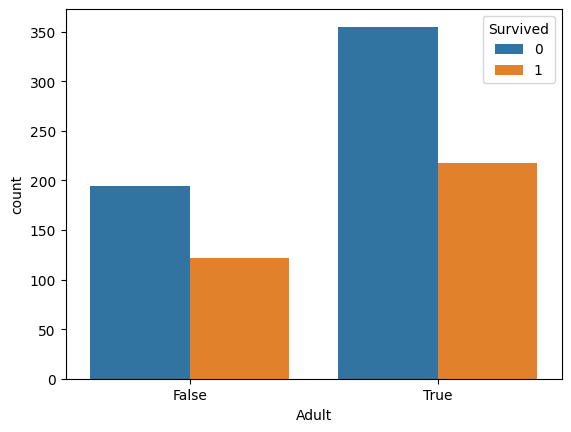

In [20]:
sns.countplot(x = 'Adult', data =file1, hue = 'Survived')
plt.show()